# WEEK 2

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# 1. Shape of dataset
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (9712, 8)


    Age            Age_Band
0    14   Teenagers (13-16)
1    11    Pre-teens (8-12)
2    18  Late Teens (17-18)
3    15   Teenagers (13-16)
4    12    Pre-teens (8-12)
5    14   Teenagers (13-16)
6    17  Late Teens (17-18)
7    10    Pre-teens (8-12)
8    14   Teenagers (13-16)
9    18  Late Teens (17-18)
10   18  Late Teens (17-18)
11   15   Teenagers (13-16)
12   12    Pre-teens (8-12)
13   11    Pre-teens (8-12)
14   15   Teenagers (13-16)


/tmp/ipython-input-1508487294.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age_Band", data=df, palette="pastel")


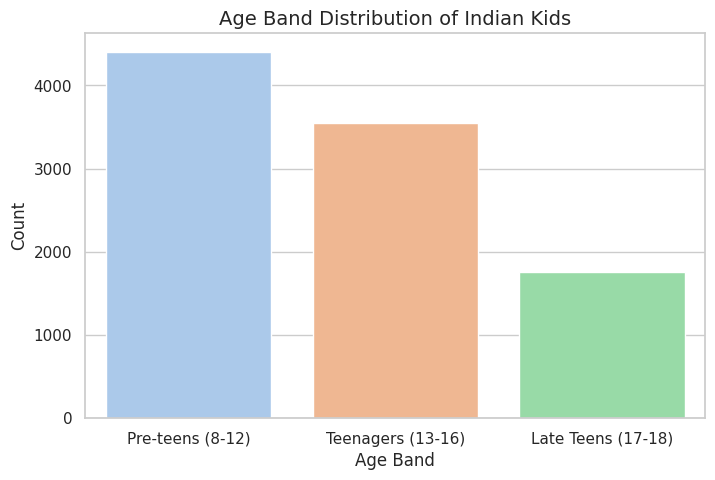

In [3]:
# Create Age Bands
bins = [7, 12, 16, 18]
labels = ["Pre-teens (8-12)", "Teenagers (13-16)", "Late Teens (17-18)"]
df["Age_Band"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

print(df[["Age", "Age_Band"]].head(15))

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Age Band distribution

# Set style
sns.set(style="whitegrid")

# Plot Age Band distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Age_Band", data=df, palette="pastel")

plt.title("Age Band Distribution of Indian Kids", fontsize=14)
plt.xlabel("Age Band", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()



/tmp/ipython-input-1018538886.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Device_Category", data=df, palette="Set2")
/tmp/ipython-input-1018538886.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Screen_Time_Category", data=df, palette="Set1")


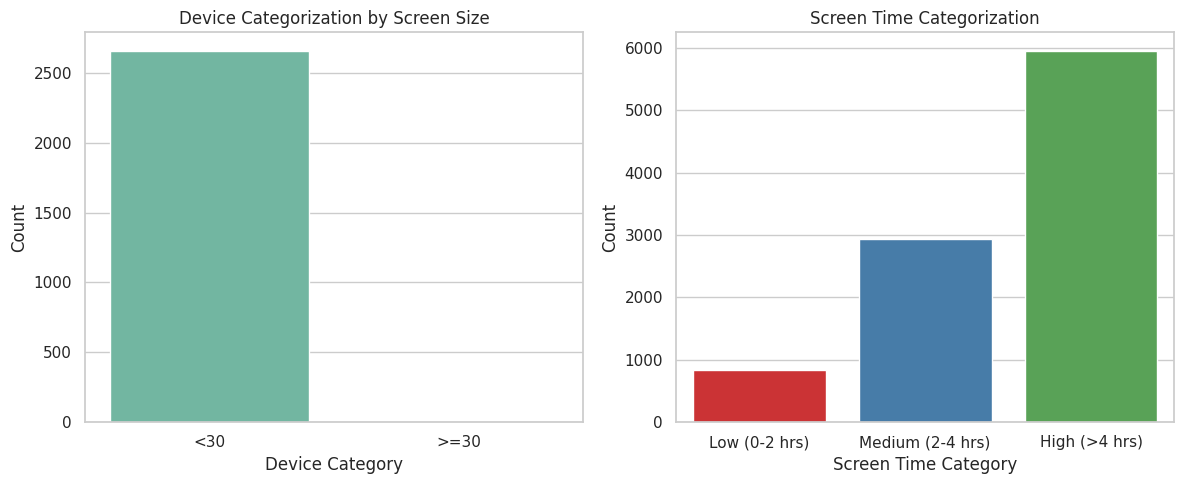

In [4]:

from pandas.api.types import CategoricalDtype   # <-- FIX

# Device Categorization by Screen Size

device_screen_size = {
    "Mobile": "<30",
    "Tablet": "<30",
    "Laptop": "<30",
    "Desktop": ">=30",
    "Television": ">=30"
}

df["Device_Category"] = df["Primary_Device"].map(device_screen_size)

# Force category order so both <30 and >=30 always appear
cat_type = CategoricalDtype(categories=["<30", ">=30"], ordered=True)
df["Device_Category"] = df["Device_Category"].astype(cat_type)

# Screen Time Categorization

df["Screen_Time_Category"] = pd.cut(
    df["Avg_Daily_Screen_Time_hr"],
    bins=[0, 2, 4, df["Avg_Daily_Screen_Time_hr"].max()],
    labels=["Low (0-2 hrs)", "Medium (2-4 hrs)", "High (>4 hrs)"],
    include_lowest=True
)


# Visualization

plt.figure(figsize=(12,5))

# Plot 1: Device Category Count
plt.subplot(1, 2, 1)
sns.countplot(x="Device_Category", data=df, palette="Set2")
plt.title("Device Categorization by Screen Size")
plt.xlabel("Device Category")
plt.ylabel("Count")

# Plot 2: Screen Time Distribution
plt.subplot(1, 2, 2)
sns.countplot(x="Screen_Time_Category", data=df, palette="Set1")
plt.title("Screen Time Categorization")
plt.xlabel("Screen Time Category")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [5]:
# Standardize Health_Impacts column
df['Health_Impacts'] = df['Health_Impacts'].astype(str).str.strip().str.lower()

df['Health_Impacts'].replace(
    ["none", "no health impacts", "nan", "na", "null", ""],
    "No Health Impacts",
    inplace=True
)

print(df['Health_Impacts'].value_counts())


Health_Impacts
No Health Impacts                                3218
poor sleep                                       2268
poor sleep, eye strain                            979
eye strain                                        644
poor sleep, anxiety                               608
poor sleep, obesity risk                          452
anxiety                                           385
poor sleep, eye strain, anxiety                   258
obesity risk                                      252
poor sleep, eye strain, obesity risk              188
eye strain, anxiety                               135
eye strain, obesity risk                          106
poor sleep, anxiety, obesity risk                  78
anxiety, obesity risk                              69
poor sleep, eye strain, anxiety, obesity risk      37
eye strain, anxiety, obesity risk                  35
Name: count, dtype: int64


/tmp/ipython-input-2419979093.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Impacts'].replace(


In [6]:
# Define categories
physical_terms = ["eye strain", "headache", "obesity", "back pain", "sleep issues"]
mental_terms = ["anxiety", "depression", "stress", "attention problems"]

def categorize_health(impact):
    if impact in physical_terms:
        return "Physical"
    elif impact in mental_terms:
        return "Mental"
    elif impact == "No Health Impacts":
        return "None"
    else:
        return "Other"

df["Health_Category"] = df["Health_Impacts"].apply(categorize_health)

print(df[["Health_Impacts", "Health_Category"]].head(20))


              Health_Impacts Health_Category
0     poor sleep, eye strain           Other
1                 poor sleep           Other
2                 poor sleep           Other
3          No Health Impacts            None
4        poor sleep, anxiety           Other
5                 poor sleep           Other
6          No Health Impacts            None
7          No Health Impacts            None
8        poor sleep, anxiety           Other
9   poor sleep, obesity risk           Other
10                poor sleep           Other
11                poor sleep           Other
12                poor sleep           Other
13                eye strain        Physical
14                poor sleep           Other
15                poor sleep           Other
16    poor sleep, eye strain           Other
17              obesity risk           Other
18                   anxiety          Mental
19         No Health Impacts            None


In [7]:
# Group by Age_Band and Health_Category
summary = df.groupby(["Age_Band", "Health_Category"]).size().unstack(fill_value=0)

print(" Health Impact Distribution by Age Band:")
print(summary)


 Health Impact Distribution by Age Band:
Health_Category     Mental  None  Other  Physical
Age_Band                                         
Pre-teens (8-12)       157  1795   2198       257
Teenagers (13-16)      151   949   2197       249
Late Teens (17-18)      77   474   1070       138


/tmp/ipython-input-1315291144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(["Age_Band", "Health_Category"]).size().unstack(fill_value=0)


In [8]:
# Save the processed DataFrame
df.to_csv('clean_indian_kids_screen_time.csv', index=False)


 **Data Cleaning & Handling Missing Values**

1. Checked for missing values → none were actual NaN, only "None" strings in Health_Impacts.

2. Replaced "None" with "No Health Impacts" to keep consistency.

3. Ensured there are no null values in the dataset now.

 **Feature Engineering**

1. Age Bands Classification

 Created custom age groups:

9–12 years → Pre-teens

13–16 years → Teenagers

17–18 years → Late Teens

 Added new column Age_Band to store this classification.

2. Health Categorization

Categorized Health_Impacts into Physical Health and Mental Health categories.

3. Device Categorization

Mapped devices into screen size groups:

<30" → Mobile, Tablet, Laptop

>30" → Desktop, Television

Added new column Device_Category.

4. Screen Time Categorization

Created screen time bands:

Low (0–2 hrs)

Medium (2–4 hrs)

High (>4 hrs)

Added new column Screen_Time_Category.

 **Visualization**

1. Device screen size distribution: showed counts of kids using <30" vs >30" screen devices.

2. Screen time distribution: visualized low, medium, and high usage categories.

3. Ensured <30 and >30 always appear on graphs, even if one has 0 values.